## Self reflection

### Document level

In [1]:
import pandas as pd
import numpy as np
from click import password_option
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

### Data loading
to perform the evaluation, the data needs to be in a dataframe with the following columns - Document, Clause Number, Clause Text.
The data preparation notebook can help create the required dataframe. 


In [3]:
data_path = 'data/clauses_w_embeddings_e5_snowflake_minilm.csv'

In [4]:
embedding_models = [('intfloat/multilingual-e5-large', 'e5'), ('Snowflake/snowflake-arctic-embed-l-v2.0', 'snowflake'), ('sentence-transformers/all-MiniLM-L12-v2', 'minilm')]

In [5]:
df = pd.read_csv(data_path)

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.head()

,Document,Clause Number,Clause Heading,Clause Text,Human Heading,Tag,Clause Word Count,Embedding_intfloat/multilingual-e5-large_Clause,Embedding_intfloat/multilingual-e5-large_Heading,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Clause,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Heading,Embedding_sentence-transformers/all-MiniLM-L12-v2_Clause,Embedding_sentence-transformers/all-MiniLM-L12-v2_Heading
0,EN50128,1,Scope,NaN,scope,u,0,[ 0.00821052 -0.01522331 -0.02773627 ... -0.02...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.00815988 -0.00112074 0.04439756 ... 0.01...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-5.61586581e-02 6.96524084e-02 3.27355750e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
1,EN50128,1.1,NaN,This European Standard specifies the process a...,scope,s,61,[ 0.04056 -0.01077269 -0.05022712 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.01203515 -0.0296172 -0.00068222 ... -0.02...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-2.44193077e-02 -4.22520377e-02 -3.41697484e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
2,EN50128,1.2,NaN,This European Standard is applicable exclusive...,scope,s,21,[ 0.03345993 -0.01828792 -0.02228408 ... 0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.01320493 0.00461948 -0.0300191 ... -0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[ 1.47426575e-02 7.25996643e-02 2.81576551e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
3,EN50128,1.3,NaN,This European Standard is not relevant for sof...,scope,s,29,[ 0.02221433 -0.02572916 -0.04346513 ... 0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.00918901 -0.00785633 0.00076057 ... 0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-3.87206674e-02 2.35516652e-02 -4.62539382e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
4,EN50128,1.4,NaN,This European Standard applies to all safety r...,scope,s,48,[ 0.03539522 -0.0190299 -0.04608537 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.0064631 0.00557209 -0.00887293 ... -0.01...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[ 3.02667730e-02 -5.14729768e-02 -3.94287668e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...


In [8]:
df = df.dropna(subset=['Clause Text'])

In [9]:
df.head()

,Document,Clause Number,Clause Heading,Clause Text,Human Heading,Tag,Clause Word Count,Embedding_intfloat/multilingual-e5-large_Clause,Embedding_intfloat/multilingual-e5-large_Heading,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Clause,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Heading,Embedding_sentence-transformers/all-MiniLM-L12-v2_Clause,Embedding_sentence-transformers/all-MiniLM-L12-v2_Heading
1,EN50128,1.1,NaN,This European Standard specifies the process a...,scope,s,61,[ 0.04056 -0.01077269 -0.05022712 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.01203515 -0.0296172 -0.00068222 ... -0.02...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-2.44193077e-02 -4.22520377e-02 -3.41697484e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
2,EN50128,1.2,NaN,This European Standard is applicable exclusive...,scope,s,21,[ 0.03345993 -0.01828792 -0.02228408 ... 0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.01320493 0.00461948 -0.0300191 ... -0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[ 1.47426575e-02 7.25996643e-02 2.81576551e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
3,EN50128,1.3,NaN,This European Standard is not relevant for sof...,scope,s,29,[ 0.02221433 -0.02572916 -0.04346513 ... 0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.00918901 -0.00785633 0.00076057 ... 0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-3.87206674e-02 2.35516652e-02 -4.62539382e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
4,EN50128,1.4,NaN,This European Standard applies to all safety r...,scope,s,48,[ 0.03539522 -0.0190299 -0.04608537 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.0064631 0.00557209 -0.00887293 ... -0.01...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[ 3.02667730e-02 -5.14729768e-02 -3.94287668e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...
5,EN50128,1.5,NaN,This European Standard also addresses the use ...,scope,s,35,[ 0.03733395 -0.00782322 -0.02362988 ... -0.02...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.00063 0.0277241 -0.0238568 ... 0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-9.37535167e-02 1.50619037e-02 1.62071269e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...


In [10]:
# Function to compute self reflection scores
def compute_self_reflection_scores(df, embedding_col, similarity_threshold=0.99):
    scores = []
    
    for doc_id, group in tqdm(df.groupby('Document'), desc="Processing Documents"):
        print(f"\n🔍 Processing Document: {doc_id}, Total Clauses: {len(group)}")
        
        # Ensure embeddings are NumPy arrays
        embeddings = np.array([
            np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ') 
            for e in group[embedding_col].values
        ])

        # Compute cosine similarity matrix
        similarities = cosine_similarity(embeddings)

        for i, row in enumerate(group.index):
            # Count how many are very similar (including itself)
            similar_count = np.sum(similarities[i] >= similarity_threshold)

            # If the clause is unique, it should have a score of 1
            score = 1 / similar_count if similar_count > 0 else 1
            scores.append(score)

    return scores

In [11]:
threshold = 0.99
for model_tuple in embedding_models:
    df[f'{model_tuple[1]}_clause_self_reflection_score_t_{str(threshold)}'] = compute_self_reflection_scores(df, f'Embedding_{model_tuple[0]}_Clause', similarity_threshold=threshold)

Processing Documents:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
Processing Documents: 100%|██████████| 3/3 [00:00<00:00, 329.2


🔍 Processing Document: EN50128, Total Clauses: 547

🔍 Processing Document: ISO26262-10, Total Clauses: 66

🔍 Processing Document: ISO26262-8, Total Clauses: 103


Processing Documents:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
Processing Documents: 100%|██████████| 3/3 [00:00<00:00, 351.7


🔍 Processing Document: EN50128, Total Clauses: 547

🔍 Processing Document: ISO26262-10, Total Clauses: 66

🔍 Processing Document: ISO26262-8, Total Clauses: 103


Processing Documents: 100%|██████████| 3/3 [00:00<00:00, 59.15it/s]


🔍 Processing Document: EN50128, Total Clauses: 547

🔍 Processing Document: ISO26262-10, Total Clauses: 66

🔍 Processing Document: ISO26262-8, Total Clauses: 103


In [12]:
df.head(1)

,Document,Clause Number,Clause Heading,Clause Text,Human Heading,Tag,Clause Word Count,Embedding_intfloat/multilingual-e5-large_Clause,Embedding_intfloat/multilingual-e5-large_Heading,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Clause,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Heading,Embedding_sentence-transformers/all-MiniLM-L12-v2_Clause,Embedding_sentence-transformers/all-MiniLM-L12-v2_Heading,e5_clause_self_reflection_score_t_0.99,snowflake_clause_self_reflection_score_t_0.99,minilm_clause_self_reflection_score_t_0.99
1,EN50128,1.1,NaN,This European Standard specifies the process a...,scope,s,61,[ 0.04056 -0.01077269 -0.05022712 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.01203515 -0.0296172 -0.00068222 ... -0.02...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-2.44193077e-02 -4.22520377e-02 -3.41697484e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...,0.0125,0.2,1.0


In [13]:
# Ensure embeddings are NumPy arrays and not stored as strings
def convert_to_array(embedding):
    if isinstance(embedding, np.ndarray):
        return embedding
    elif isinstance(embedding, list):
        return np.array(embedding)
    elif isinstance(embedding, str):
        return np.fromstring(embedding.strip("[]"), sep=' ')
    else:
        raise ValueError(f"Unexpected embedding format: {type(embedding)}")

In [14]:
def get_similar_clauses(df, target_row, embedding_col, similarity_threshold=0.99):
    """
    Find similar clauses for a given row within the same document.
    
    Args:
        df (pd.DataFrame): DataFrame containing all records.
        target_row (pd.Series): A single row (record) from df.
        embedding_col (str): Column containing embeddings.
        similarity_threshold (float): Minimum similarity for a clause to be considered similar.

    Returns:
        pd.DataFrame: DataFrame containing similar clauses and their similarity scores.
    """
    doc_id = target_row['Document']
    
    # Filter to only include records from the same document
    doc_df = df[df['Document'] == doc_id].copy()
    
    # Ensure embeddings are NumPy arrays
    embeddings = np.array([
        np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ') 
        for e in doc_df[embedding_col].values
    ])
    
    # Find index of the target row within doc_df
    target_embedding = target_embedding = convert_to_array(target_row[embedding_col]).reshape(1, -1)
    
    # Compute cosine similarity between target embedding and all embeddings in the document
    similarities = cosine_similarity(target_embedding, embeddings).flatten()
    
    # Filter out clauses below the similarity threshold
    doc_df['Similarity'] = similarities
    similar_clauses_df = doc_df[doc_df['Similarity'] >= similarity_threshold].copy()
    
    # Sort by similarity (highest first)
    similar_clauses_df = similar_clauses_df.sort_values(by="Similarity", ascending=False)

    return similar_clauses_df[['Clause Text', 'Document', 'Similarity']]

In [15]:
record_index = 10
target_row = df.iloc[record_index]

In [16]:
similar_clauses = get_similar_clauses(df, target_row, f'Embedding_{embedding_models[2][0]}_Clause', similarity_threshold=0.99)

In [17]:
similar_clauses.iloc[0:5]

,Clause Text,Document,Similarity
12,"For the purposes of this document, the followi...",EN50128,1.0


### Visualize the results

In [18]:
threshold = 0.999999
for model_tuple in embedding_models:
    df[f'{model_tuple[1]}_clause_self_reflection_score_t_{str(threshold)}'] = compute_self_reflection_scores(df, f'Embedding_{model_tuple[0]}_Clause', similarity_threshold=threshold)

Processing Documents:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
Processing Documents: 100%|██████████| 3/3 [00:00<00:00, 285.5


🔍 Processing Document: EN50128, Total Clauses: 547

🔍 Processing Document: ISO26262-10, Total Clauses: 66

🔍 Processing Document: ISO26262-8, Total Clauses: 103


Processing Documents:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\1659538488.py:10: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.array(e) if isinstance(e, (list, np.ndarray)) else np.fromstring(e.strip("[]"), sep=' ')
Processing Documents: 100%|██████████| 3/3 [00:00<00:00, 398.2


🔍 Processing Document: EN50128, Total Clauses: 547

🔍 Processing Document: ISO26262-10, Total Clauses: 66

🔍 Processing Document: ISO26262-8, Total Clauses: 103


Processing Documents: 100%|██████████| 3/3 [00:00<00:00, 55.72it/s]


🔍 Processing Document: EN50128, Total Clauses: 547

🔍 Processing Document: ISO26262-10, Total Clauses: 66

🔍 Processing Document: ISO26262-8, Total Clauses: 103


In [19]:
df.head(5)

,Document,Clause Number,Clause Heading,Clause Text,Human Heading,Tag,Clause Word Count,Embedding_intfloat/multilingual-e5-large_Clause,Embedding_intfloat/multilingual-e5-large_Heading,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Clause,Embedding_Snowflake/snowflake-arctic-embed-l-v2.0_Heading,Embedding_sentence-transformers/all-MiniLM-L12-v2_Clause,Embedding_sentence-transformers/all-MiniLM-L12-v2_Heading,e5_clause_self_reflection_score_t_0.99,snowflake_clause_self_reflection_score_t_0.99,minilm_clause_self_reflection_score_t_0.99,e5_clause_self_reflection_score_t_0.999999,snowflake_clause_self_reflection_score_t_0.999999,minilm_clause_self_reflection_score_t_0.999999
1,EN50128,1.1,NaN,This European Standard specifies the process a...,scope,s,61,[ 0.04056 -0.01077269 -0.05022712 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.01203515 -0.0296172 -0.00068222 ... -0.02...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-2.44193077e-02 -4.22520377e-02 -3.41697484e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...,0.012500,0.200000,1.0,1.0,1.0,1.0
2,EN50128,1.2,NaN,This European Standard is applicable exclusive...,scope,s,21,[ 0.03345993 -0.01828792 -0.02228408 ... 0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.01320493 0.00461948 -0.0300191 ... -0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[ 1.47426575e-02 7.25996643e-02 2.81576551e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...,0.032258,1.000000,1.0,1.0,1.0,1.0
3,EN50128,1.3,NaN,This European Standard is not relevant for sof...,scope,s,29,[ 0.02221433 -0.02572916 -0.04346513 ... 0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[-0.00918901 -0.00785633 0.00076057 ... 0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-3.87206674e-02 2.35516652e-02 -4.62539382e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...,0.029412,0.083333,1.0,1.0,1.0,1.0
4,EN50128,1.4,NaN,This European Standard applies to all safety r...,scope,s,48,[ 0.03539522 -0.0190299 -0.04608537 ... -0.00...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.0064631 0.00557209 -0.00887293 ... -0.01...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[ 3.02667730e-02 -5.14729768e-02 -3.94287668e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...,0.013158,0.500000,1.0,1.0,1.0,1.0
5,EN50128,1.5,NaN,This European Standard also addresses the use ...,scope,s,35,[ 0.03733395 -0.00782322 -0.02362988 ... -0.02...,[-0.00119899 0.01662432 -0.0293218 ... -0.01...,[ 0.00063 0.0277241 -0.0238568 ... 0.00...,[ 0.02655863 0.00925995 0.00356737 ... -0.01...,[-9.37535167e-02 1.50619037e-02 1.62071269e-...,[ 3.83796506e-02 5.48125803e-02 -5.89791983e-...,0.027027,1.000000,1.0,1.0,1.0,1.0


In [ ]:
!pip install seaborn

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def plot_self_reflection_histograms(df, model_tuples, thresholds):
    """
    Plots histograms for multiple embedding models and thresholds dynamically.
    
    :param df: Pandas DataFrame containing the scores.
    :param models: List of embedding model names (e.g., ['e5', 'snowflake']).
    :param thresholds: List of thresholds (e.g., ['099', '0999999']).
    """
    num_plots = len(model_tuples) * len(thresholds)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 4, 6), sharey=True)
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot case
    
    plot_idx = 0
    for model in model_tuples:
        for threshold in thresholds:
            column_name = f"{model[1]}_clause_self_reflection_score_t_{threshold}"
            if column_name in df.columns:
                sns.histplot(
                    data=df, x=column_name, hue='Document', bins=20, kde=True, alpha=0.6, ax=axes[plot_idx]
                )
                axes[plot_idx].set_title(f"Histogram of Scores {model[1]} (Threshold {threshold})")
                axes[plot_idx].set_xlabel(f"Clause Self-Reflection Score (t={threshold})")
                axes[plot_idx].grid(True)
                plot_idx += 1
    
    # Adjust legend to appear outside the plot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Source Document", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout(pad=5.0)
    plt.show()


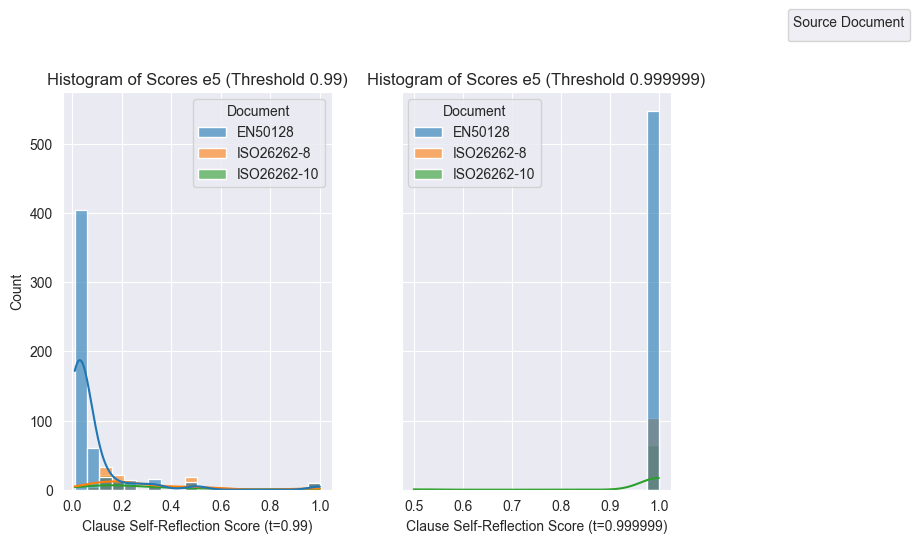

In [25]:
thresholds = [0.99, 0.999999]  # Add more thresholds as needed
plot_self_reflection_histograms(df, [embedding_models[0]], thresholds)

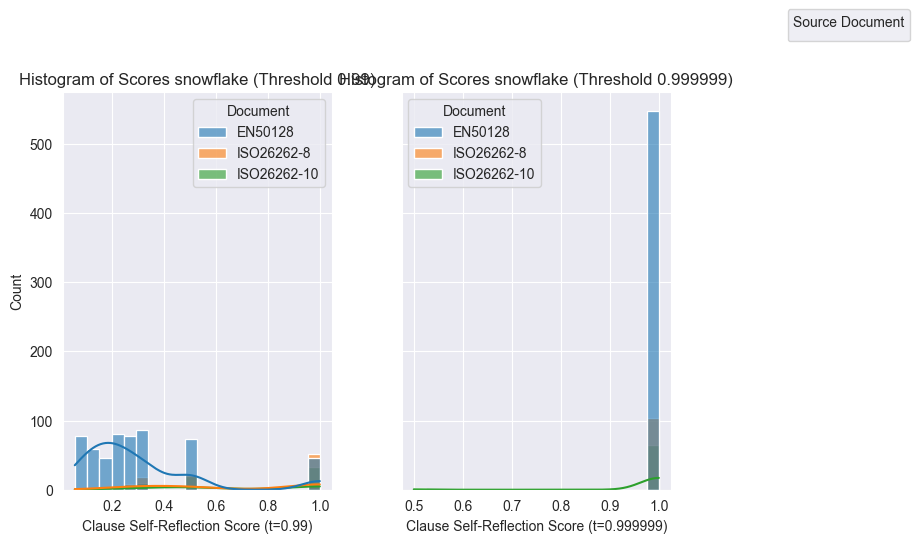

In [26]:
thresholds = [0.99, 0.999999]  # Add more thresholds as needed
plot_self_reflection_histograms(df, [embedding_models[1]], thresholds)

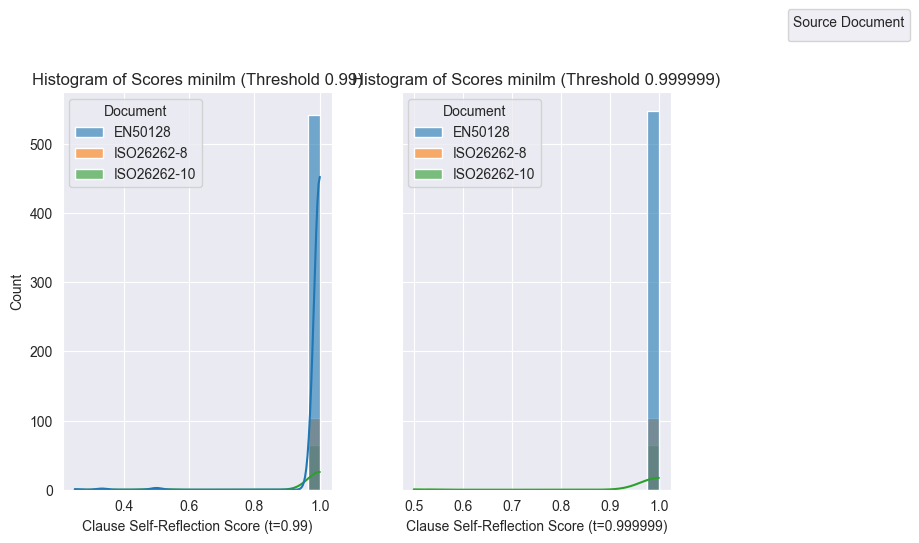

In [27]:
thresholds = [0.99, 0.999999]  # Add more thresholds as needed
plot_self_reflection_histograms(df, [embedding_models[2]], thresholds)

### Bijection Scores

#### Clause level

In [28]:
def parse_embedding(embedding):
    """ Converts string representation of embeddings to NumPy arrays """
    if isinstance(embedding, str):
        return np.fromstring(embedding.strip('[]'), sep=' ')
    return np.array(embedding)


In [29]:
def compute_bijection_score(df, model_column):
    """
    Computes the Bijection Score for a given embedding model.
    :param df: DataFrame containing Document, Clause Text, and embeddings.
    :param model_column: Column name containing the clause embeddings.
    :return: Bijection Score (float)
    """
    df = df.reset_index(drop=True)  # Ensure index alignment
    documents = df['Document'].unique()
    df[model_column] = df[model_column].apply(parse_embedding)  # Ensure embeddings are numeric
    embeddings = np.vstack(df[model_column].values)
    similarity_matrix = cosine_similarity(embeddings)
    
    bijection_matches = 0
    total_clauses = 0
    
    for i, row in df.iterrows():
        doc_A = row['Document']
        best_matches = {}
        
        for doc_B in documents:
            if doc_B == doc_A:
                continue
            
            valid_indices = df[df['Document'] == doc_B].index.to_numpy()
            
            if valid_indices.size == 0:
                continue
            
            similarities = similarity_matrix[i, valid_indices]
            best_match_idx = valid_indices[np.argmax(similarities)]
            best_matches[doc_B] = best_match_idx
        
        for doc_B, best_match_idx in best_matches.items():
            reverse_valid_indices = df[df['Document'] == doc_A].index.to_numpy()
            reverse_similarities = similarity_matrix[best_match_idx, reverse_valid_indices]
            reverse_best_match_idx = reverse_valid_indices[np.argmax(reverse_similarities)]
            
            if reverse_best_match_idx == i:
                bijection_matches += 1
            
            total_clauses += 1
    
    return bijection_matches / total_clauses if total_clauses > 0 else 0.0

In [30]:
embedding_column = f'Embedding_{embedding_models[0][0]}_Clause'
score = compute_bijection_score(df, embedding_column)

C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\2974320074.py:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(embedding.strip('[]'), sep=' ')


In [31]:
score

0.22206703910614525

In [32]:
embedding_column = f'Embedding_{embedding_models[1][0]}_Clause'
score = compute_bijection_score(df, embedding_column)
score

C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\2974320074.py:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(embedding.strip('[]'), sep=' ')


0.22625698324022347

In [33]:
embedding_column = f'Embedding_{embedding_models[2][0]}_Clause'
score = compute_bijection_score(df, embedding_column)
score

0.08519553072625698

In [34]:
def compute_relaxed_bijection_score(df, model_column, top_k=5):
    """
    Computes the Symmetry Score for a given embedding model using top-K matches.
    :param df: DataFrame containing Document, Clause Text, and embeddings.
    :param model_column: Column name containing the clause embeddings.
    :param top_k: Number of top matches to consider.
    :return: Symmetry Score (float)
    """
    df = df.reset_index(drop=True)  # Ensure index alignment
    documents = df['Document'].unique()
    df[model_column] = df[model_column].apply(parse_embedding)  # Ensure embeddings are numeric
    embeddings = np.vstack(df[model_column].values)
    similarity_matrix = cosine_similarity(embeddings)
    
    symmetric_matches = 0
    total_pairs = 0
    
    for i, row in df.iterrows():
        doc_A = row['Document']
        top_k_matches = {}
        
        for doc_B in documents:
            if doc_B == doc_A:
                continue
            
            valid_indices = df[df['Document'] == doc_B].index.to_numpy()
            
            if valid_indices.size == 0:
                continue
            
            similarities = similarity_matrix[i, valid_indices]
            top_k_indices = valid_indices[np.argsort(similarities)[-top_k:]]
            top_k_matches[doc_B] = top_k_indices
        
        for doc_B, top_k_indices in top_k_matches.items():
            for j in top_k_indices:
                reverse_valid_indices = df[df['Document'] == doc_A].index.to_numpy()
                reverse_similarities = similarity_matrix[j, reverse_valid_indices]
                reverse_top_k_indices = reverse_valid_indices[np.argsort(reverse_similarities)[-top_k:]]
                
                if i in reverse_top_k_indices:
                    symmetric_matches += 1
                total_pairs += 1
    
    return symmetric_matches / total_pairs if total_pairs > 0 else 0.0

### Scores computation

In [35]:
embedding_column = f'Embedding_{embedding_models[0][0]}_Clause'
score = compute_relaxed_bijection_score(df, embedding_column, top_k=3)
score

C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\2974320074.py:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(embedding.strip('[]'), sep=' ')


0.2723463687150838

In [36]:
embedding_column = f'Embedding_{embedding_models[1][0]}_Clause'
score = compute_relaxed_bijection_score(df, embedding_column, top_k=1000)
score

C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\2974320074.py:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(embedding.strip('[]'), sep=' ')


1.0

In [37]:
embedding_column = f'Embedding_{embedding_models[1][0]}_Clause'
score = compute_relaxed_bijection_score(df, embedding_column, top_k=3)
score

C:\Users\Yuval\AppData\Local\Temp\ipykernel_46504\2974320074.py:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(embedding.strip('[]'), sep=' ')


0.271415270018622

In [38]:
embedding_column = f'Embedding_{embedding_models[2][0]}_Clause'
score = compute_relaxed_bijection_score(df, embedding_column, top_k=3)
score

0.11312849162011174